In [1]:
import torch

In [2]:
torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3)

Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))

In [8]:
a = np.random.rand(3)
print(a)
torch.tensor(a)

[0.30540011 0.17227613 0.70361658]


tensor([0.3054, 0.1723, 0.7036], dtype=torch.float64)

In [10]:
torch.tensor([[1,2,3]])

tensor([[1, 2, 3]])

In [41]:
import cv2

In [87]:
cv2.blur(image, (4,4))

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

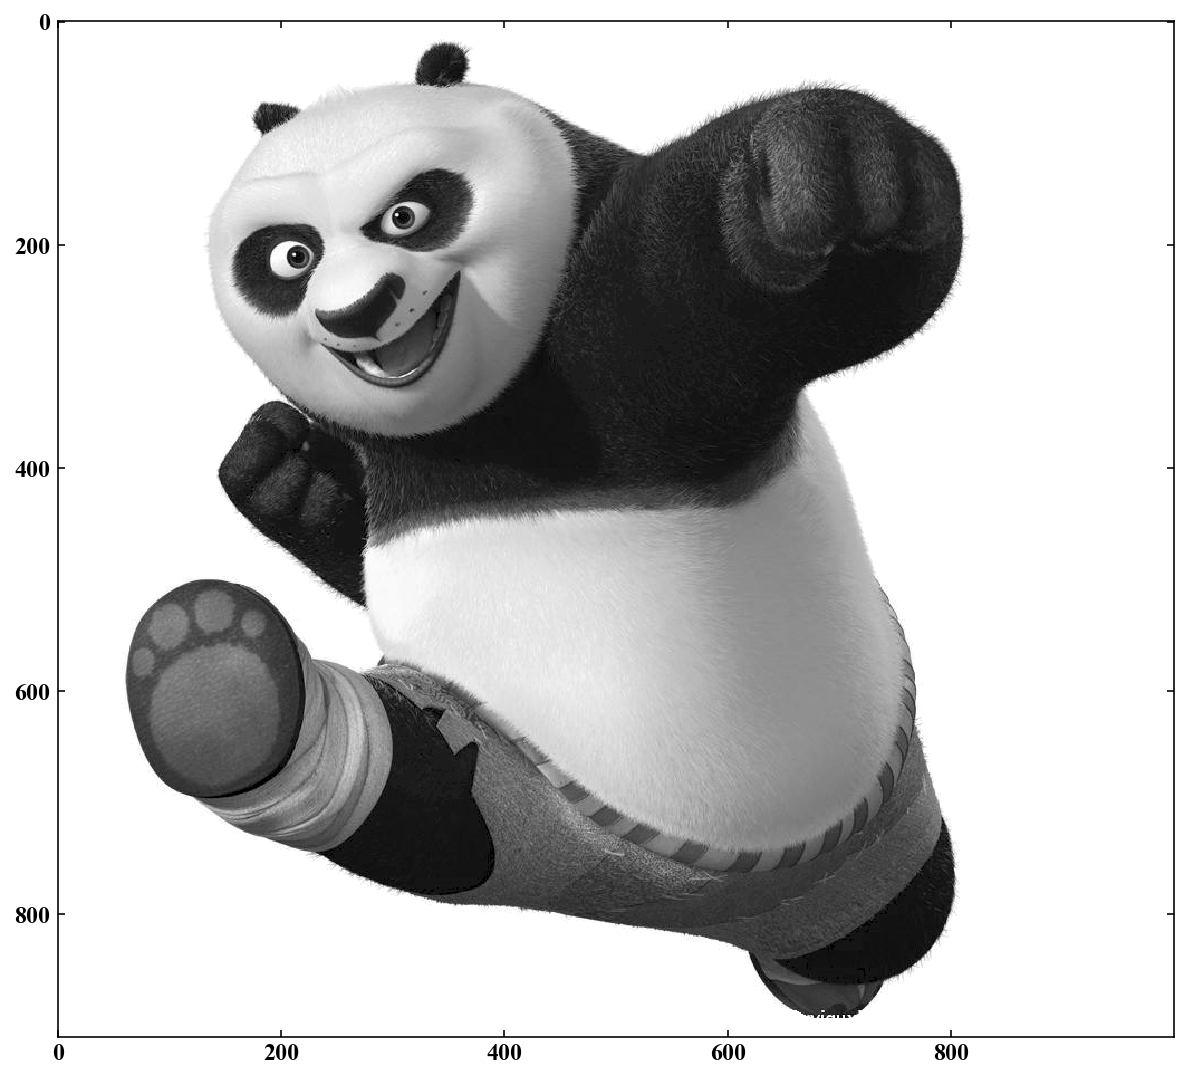

torch.Size([1000, 910])


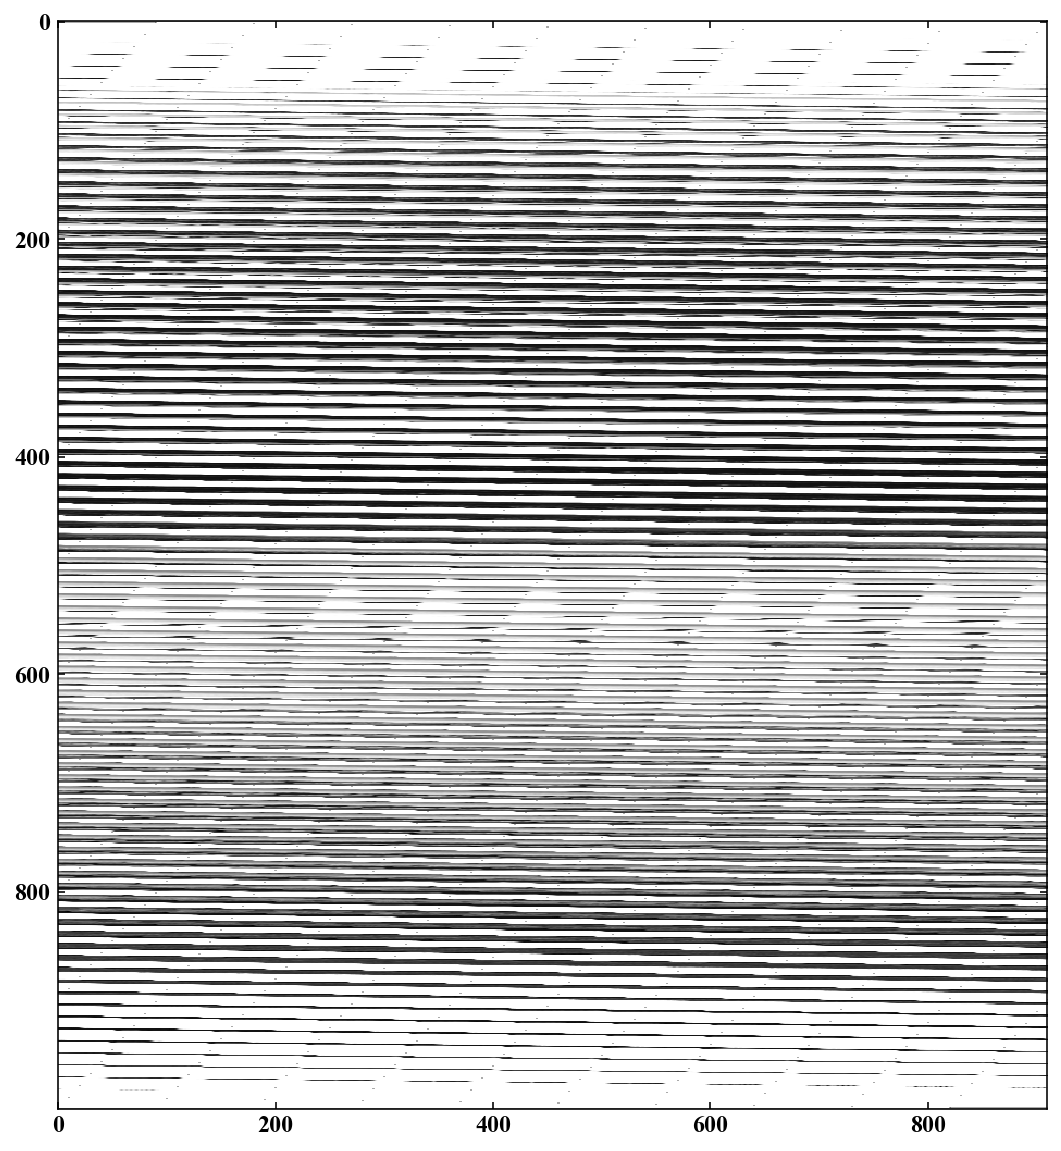

In [434]:
def torch_gaussBlur(image):
    '''image: 2D numpy array '''
    img = torch.tensor(image/255,dtype=torch.float32)
    h,w = img.shape
    img = img.reshape((1, 1, h, w)).cuda()

    kernel = 1/9 *torch.tensor([[1,1,1],
                               [1,1,1],
                               [1,1,1]], dtype=torch.float32)
    kh, kw = kernel.shape
    kernel = kernel.reshape((1,1,kh,kw)).cuda()
    return torch.conv2d(img,kernel,padding=1)# input tensor of shape :math:`(\text{minibatch} , \text{in\_channels} , iH , iW)`

image = cv2.imread('gongfuxiongmao.png',0)
plt.figure(figsize=(10,10))
plt.imshow(image,cmap='gray');plt.show()
image_blur = torch_gaussBlur(image)

res = image_blur.cpu().reshape(w, h)
print(res.shape)
plt.figure(figsize=(10,10))
plt.imshow(res, cmap='gray')

In [286]:
import kornia
image = cv2.imread('gongfuxiongmao.png',0)
h, w = image.shape
img = torch.tensor(image/255,dtype=torch.float32)

img = img.reshape((1, 1, h, w)).cuda()

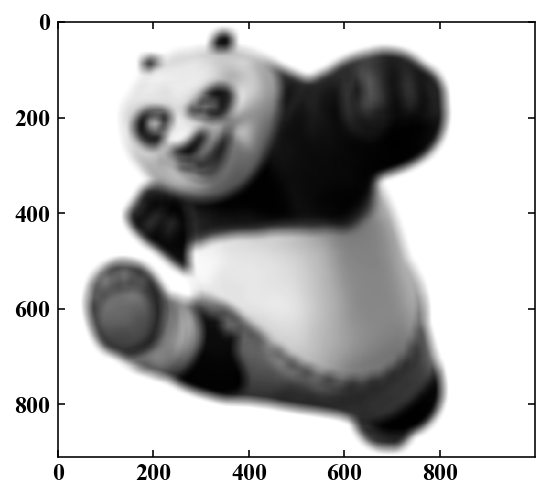

In [289]:
blur = kornia.filters.BoxBlur((27,27))
output = blur(img) 
plt.imshow(output.cpu().numpy().reshape(h,w), cmap='gray')

In [105]:
cv2.CV_32F

5

In [ ]:
blur = kornia.filters.BoxBlur(kern)
output = blur(img.astype("float32")) 

In [ ]:
cv2.filter2D(img.astype("float32"),kern)

In [11]:
import math
import cv2

import torchvision.transforms as transforms

In [376]:
def generate_motion_blur_kernel(dim=3,angle=0.,threshold_factor=1.3,divide_by_dim=True):
    radian = angle/360*math.pi*2 + math.pi/2

    # first, generate xslope and yslope
    gby,gbx = torch.meshgrid([torch.arange(0,dim), torch.arange(0,dim)])
    cen = (dim+1)/2-1
    gbx = gbx.float() - float(cen)
    gby = gby.float() - float(cen)

    # then mix the slopes according to angle
    gbmix = gbx * math.cos(radian) - gby * math.sin(radian)

    kernel = (threshold_factor - gbmix*gbmix).clamp(min=0.,max=1.)

    if divide_by_dim:
        kernel /= dim * dim * torch.mean(kernel)
    else:
        pass

    return kernel

def getkernelsize(r):
    k = min(55,int(r))
    if k%2==0:
        k+=1
    if k<3:
        k+=2
    return k

ldim = 51#getkernelsize(2)

kern = generate_motion_blur_kernel(dim=ldim,angle=0).cpu().numpy()
img = np.arange(0,330).reshape(10,11,3)#np.arange(0,25).reshape(5,5,1)
img = cv2.imread('gongfuxiongmao.png')
print(img.shape)
torch.Tensor(cv2.filter2D(img.astype("float32"),cv2.CV_32F,kern)).shape

(910, 1000, 3)


torch.Size([910, 1000, 3])

In [400]:
image = cv2.imread("gongfuxiongmao.png")


In [47]:
import torch.nn.functional as F
img = np.arange(0,25).reshape(5,5,1)
h,w,c = img.shape
img = torch.tensor(img.reshape(1,c,h,w), dtype=torch.float32).cuda()
img = F.pad(img, pad = [1, 1, 1, 1], mode='reflect')
img

tensor([[[[ 6.,  5.,  6.,  7.,  8.,  9.,  8.],
          [ 1.,  0.,  1.,  2.,  3.,  4.,  3.],
          [ 6.,  5.,  6.,  7.,  8.,  9.,  8.],
          [11., 10., 11., 12., 13., 14., 13.],
          [16., 15., 16., 17., 18., 19., 18.],
          [21., 20., 21., 22., 23., 24., 23.],
          [16., 15., 16., 17., 18., 19., 18.]]]], device='cuda:0')

# 正题

In [433]:
img = np.arange(0,33000).reshape(100,110,3)#np.arange(0,25).reshape(5,5,1)
img = image
h,w,c = img.shape
print(img.shape)
img = img[None,...]
img = torch.tensor(img, dtype=torch.float32).cuda()
img = img.permute(0,3,1,2)
kern = generate_motion_blur_kernel(dim=20,angle=0).cpu().numpy() # 这里如果是kern是cuda()，就不需要.cpu().numpy()了，因为后续操作全都是在gpu上
print(kern.shape)
kh,kw =kern.shape
kern = torch.tensor(kern, dtype=torch.float32).cuda()
kernel = torch.cat((c*[kern]), dim=0).reshape((c,1,kh, kw))
if kh % 2 == 0 :
    dh = int((kh-2)/2)
    dw = dh+1
else:
    dh = int((kh-1)/2)
    dw = dh 
print(dh,dw)
img = F.pad(img, pad =(dh,dw,dw,dh), mode='reflect')
res = F.conv2d(img,weight=kernel,padding=0, groups=c)
# print(res.shape)
res=res.squeeze(0)
res.permute(1,2,0).shape

(910, 1000, 3)
(20, 20)
9 10


torch.Size([910, 1000, 3])